In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astroplan import FixedTarget, Observer
from astroplan.plots import plot_airmass, plot_sky, plot_finder_image


>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]


In [2]:
#coordinates = SkyCoord('19h50m47.6s', '+08d52m12.0s', frame='icrs')
#altair = FixedTarget(name='Altair', coord=coordinates)
altair = FixedTarget.from_name('Altair')

In [3]:
m68 = FixedTarget.from_name('M68')
m72 = FixedTarget.from_name('M72')
m68, m72

(<FixedTarget "M68" at SkyCoord (ICRS): (ra, dec) in deg ( 189.8667092, -26.7430391)>,
 <FixedTarget "M72" at SkyCoord (ICRS): (ra, dec) in deg ( 313.3662973, -12.5370564)>)

In [4]:
paranal = Observer.at_site('paranal')
paranal

<Observer: name='paranal',
    location (lon, lat, el)=(-70.40300000000002 deg, -24.6252 deg, 2634.9999999999145 m),
    timezone=<UTC>>

In [5]:
time = Time('2017-07-15 06:00:00')
#time = Time.now()
time

<Time object: scale='utc' format='iso' value=2017-07-15 06:00:00.000>

In [6]:
paranal.target_is_up(time, m68)

False

In [7]:
paranal.target_is_up(time, m72)

True

In [8]:
paranal.is_night(time)

True

In [9]:
paranal.target_rise_time(time, m72).iso, paranal.target_set_time(time, m72).iso

('2017-07-14 23:40:40.632', '2017-07-15 12:25:07.455')

In [10]:
paranal.sun_set_time(time, which='nearest').iso

'2017-07-14 22:05:50.431'

In [11]:
paranal.sun_rise_time(time, which='nearest').iso

'2017-07-15 11:29:05.952'

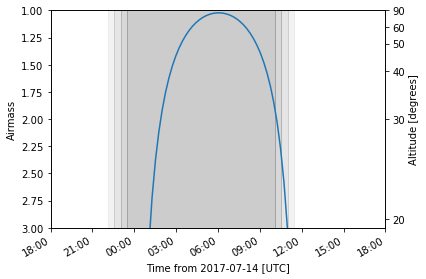

In [12]:
plot_airmass(m72, paranal, time, brightness_shading=True, altitude_yaxis=True)

In [13]:
paranal.altaz(time, m72)

<SkyCoord (AltAz: obstime=2017-07-15 06:00:00.000, location=(1946618.261025452, -5467645.090548764, -2642488.447714588) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0, obswl=1.0 micron): (az, alt) in deg
    ( 3.36917614,  77.82314044)>

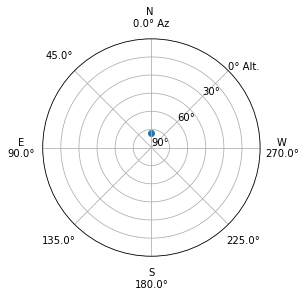

In [14]:
plot_sky(m72, paranal, time)

In [15]:
sunset_tonight = paranal.sun_set_time(time, which='nearest')
sunrise_tonight = paranal.sun_rise_time(time, which='nearest')

m72_rise = paranal.target_rise_time(time, m72) + 5*u.minute
m72_set = paranal.target_set_time(time, m72) - 5*u.minute

start = np.max([sunset_tonight, m72_rise])
end = np.min([sunrise_tonight, m72_set])
start.iso, end.iso 

('2017-07-14 23:45:40.632', '2017-07-15 11:29:05.952')

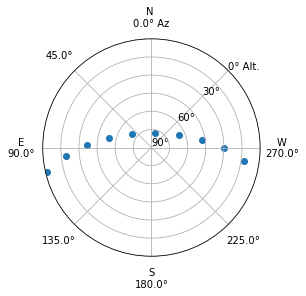

In [16]:
time_window = start + (end - start) * np.linspace(0, 1, 10)
plot_sky(m72, paranal, time_window)

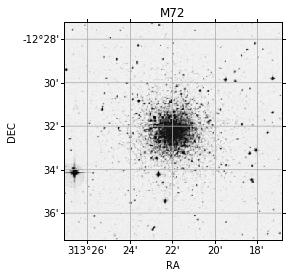

In [17]:
ax, hdu = plot_finder_image(m72)

In [18]:
time_range = Time(["2017-07-16 00:00", "2017-07-16 12:00"])